In [1]:
from tsp_solve_backtracking import backtracking, backtracking_bssf
from utils import Timer, generate_network
import matplotlib.pyplot as plt

In [2]:
time_limits = [5, 10, 15, 20, 25, 30]
size = 15
backtracking_solutions = []
bssf_solutions = []

In [3]:
for time in time_limits:
    locations, graph = generate_network(size, euclidean=True, reduction=0.0, normal=False, seed=42)
    back_solution = backtracking(graph, Timer(time))[-1]
    try:
        bssf_solution = backtracking_bssf(graph, Timer(time))[-1]
    except IndexError as e:
        bssf_solution = None
        print(f"BSSF couldnt find a better solution than greedy within {time} seconds.")

    backtracking_solutions.append(back_solution)
    bssf_solutions.append(bssf_solution)

BSSF couldnt find a better solution than greedy within 5 seconds.
BSSF couldnt find a better solution than greedy within 10 seconds.
BSSF couldnt find a better solution than greedy within 15 seconds.


In [4]:
back_queue_sizes = [sol.max_queue_size if sol else 0 for sol in backtracking_solutions]
bssf_queue_sizes = [sol.max_queue_size if sol else 0 for sol in bssf_solutions]


back_nodes_expanded = [sol.n_nodes_expanded if sol else 0 for sol in backtracking_solutions]
bssf_nodes_expanded = [sol.n_nodes_expanded if sol else 0 for sol in bssf_solutions]

back_nodes_pruned = [sol.n_nodes_pruned if sol else 0 for sol in backtracking_solutions]
bssf_nodes_pruned = [sol.n_nodes_pruned if sol else 0 for sol in bssf_solutions]

back_fraction_covered = [sol.fraction_leaves_covered if sol else 0 for sol in backtracking_solutions]
bssf_fraction_covered = [sol.fraction_leaves_covered if sol else 0 for sol in bssf_solutions]

back_amount_covered = [sol.n_leaves_covered if sol else 0 for sol in backtracking_solutions]
bssf_amount_covered = [sol.n_leaves_covered if sol else 0 for sol in bssf_solutions]

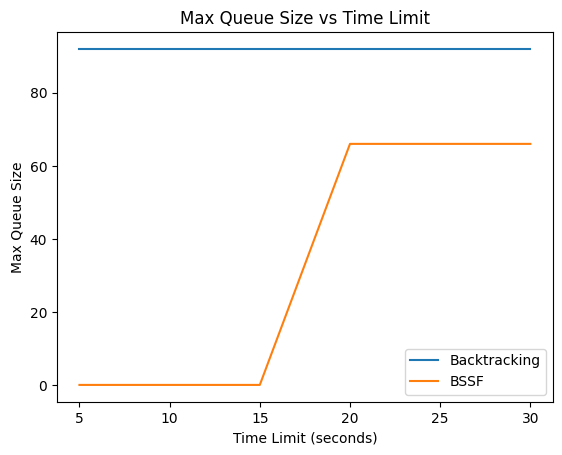

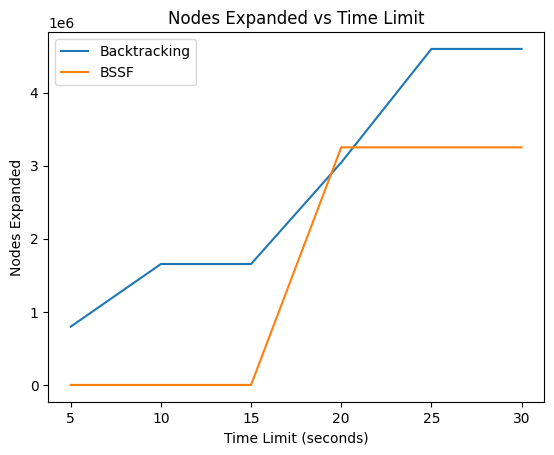

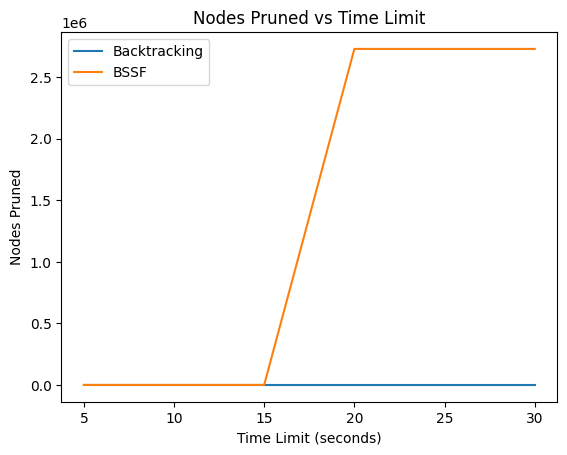

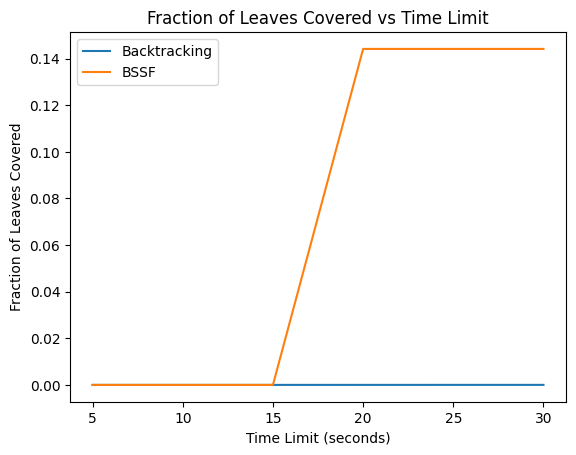

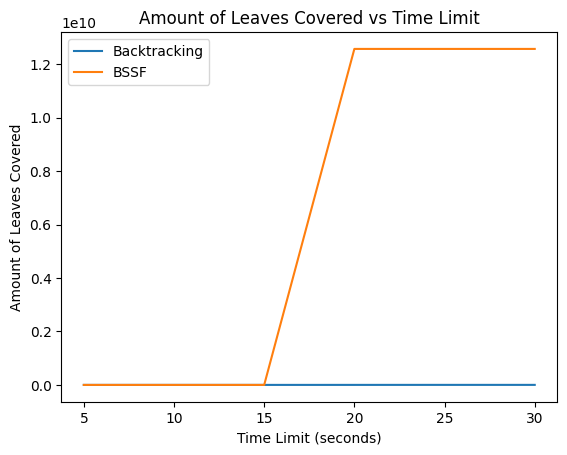

[293326, 608528, 608528, 1119886, 1691588, 1691588]
[0, 0, 0, 12568129300, 12568129300, 12568129300]


In [8]:
plt.clf()
plt.plot(time_limits, back_queue_sizes, label='Backtracking')
plt.plot(time_limits, bssf_queue_sizes, label='BSSF')
plt.xlabel('Time Limit (seconds)')
plt.ylabel('Max Queue Size')
plt.title('Max Queue Size vs Time Limit')
plt.legend()
plt.show()

plt.clf()
plt.plot(time_limits, back_nodes_expanded, label='Backtracking')
plt.plot(time_limits, bssf_nodes_expanded, label='BSSF')
plt.xlabel('Time Limit (seconds)')
plt.ylabel('Nodes Expanded')
plt.title('Nodes Expanded vs Time Limit')
plt.legend()
plt.show()

plt.clf()
plt.plot(time_limits, back_nodes_pruned, label='Backtracking')
plt.plot(time_limits, bssf_nodes_pruned, label='BSSF')
plt.xlabel('Time Limit (seconds)')
plt.ylabel('Nodes Pruned')
plt.title('Nodes Pruned vs Time Limit')
plt.legend()
plt.show()

plt.clf()
plt.plot(time_limits, back_fraction_covered, label='Backtracking')
plt.plot(time_limits, bssf_fraction_covered, label='BSSF')
plt.xlabel('Time Limit (seconds)')
plt.ylabel('Fraction of Leaves Covered')
plt.title('Fraction of Leaves Covered vs Time Limit')
plt.legend()
plt.show()

plt.clf()
plt.plot(time_limits, back_amount_covered, label='Backtracking')
plt.plot(time_limits, bssf_amount_covered, label='BSSF')
plt.xlabel('Time Limit (seconds)')
plt.ylabel('Amount of Leaves Covered')
plt.title('Amount of Leaves Covered vs Time Limit')
plt.legend()
plt.show()

print(back_amount_covered)
print(bssf_amount_covered)